<a href="https://www.kaggle.com/code/sudhanshu2198/bank-customer-churn-prediction?scriptVersionId=109642748" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-card-customers/BankChurners.csv


# Data Summary

In [2]:
data=pd.read_csv('../input/credit-card-customers/BankChurners.csv')

In [3]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [4]:
data=data[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
          'Dependent_count', 'Education_Level', 'Marital_Status',
          'Income_Category', 'Card_Category', 'Months_on_book',
          'Total_Relationship_Count', 'Months_Inactive_12_mon',
          'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
          'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
          'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
          
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [7]:
data.describe(include='O').T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [8]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [9]:
data.duplicated().any()

False

# Exploratory Data Analysis

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)

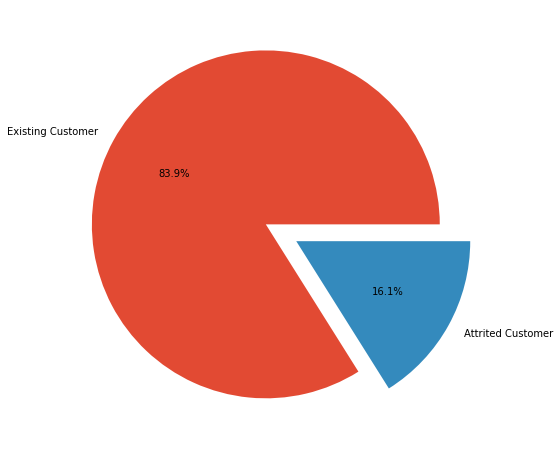

In [11]:
inter=data['Attrition_Flag'].value_counts()
plt.pie(inter,labels=inter.index,autopct='%0.1f%%',explode=[0.0,0.2]);

**There is imbalance in class distribution of target variable**

In [12]:
def plot_num(var):
    
    plt.subplot(1,2,1)
    sns.histplot(data=data,x=var,hue='Attrition_Flag',kde=True);
    
    plt.subplot(1,2,2)
    sns.boxplot(x='Attrition_Flag',y=var,data=data);

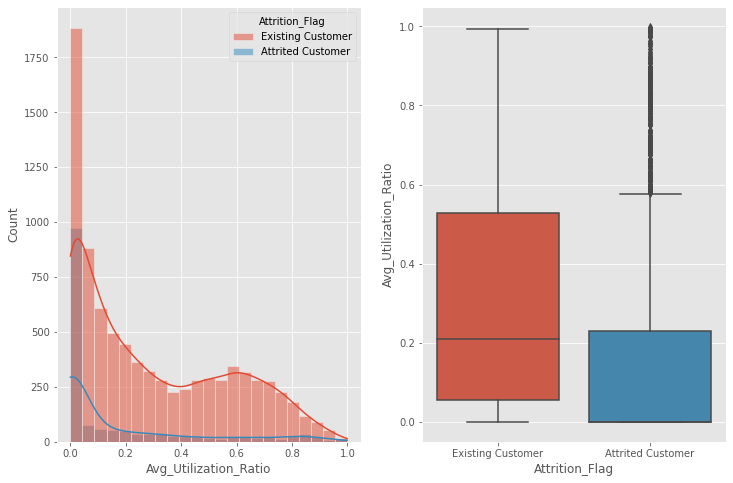

In [13]:
plot_num('Avg_Utilization_Ratio')

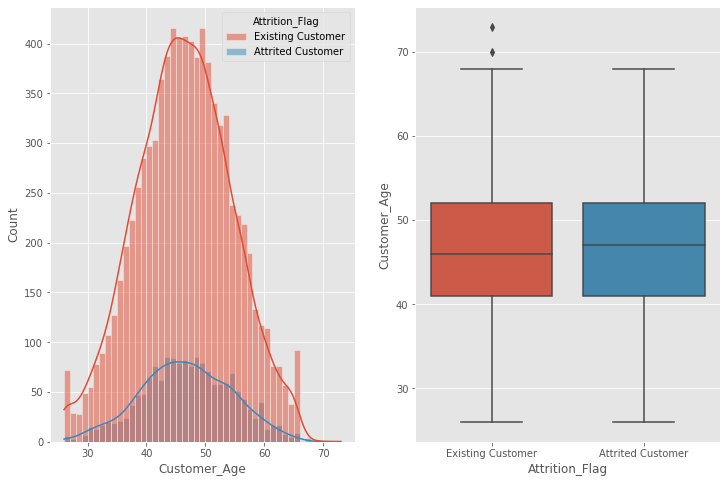

In [14]:
plot_num('Customer_Age')

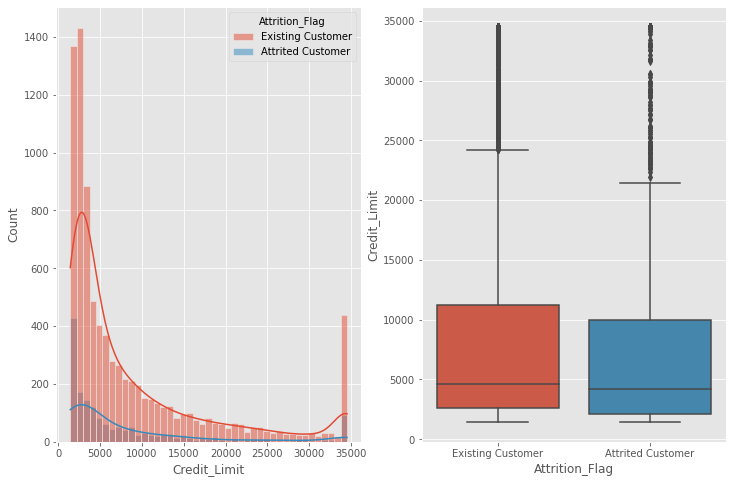

In [15]:
plot_num('Credit_Limit')

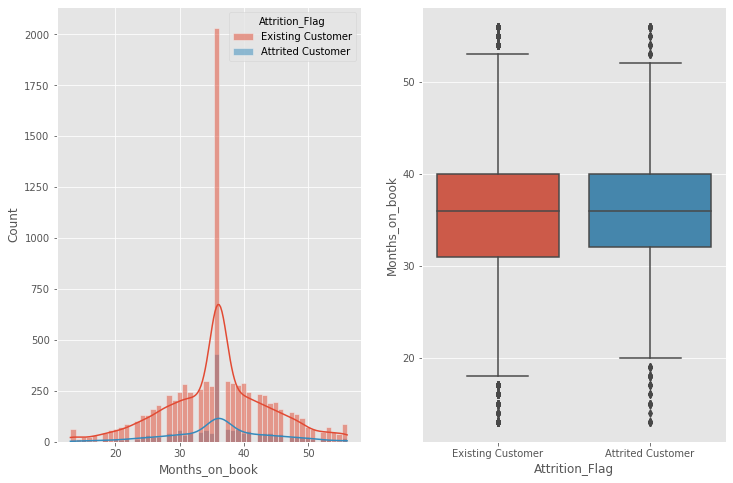

In [16]:
plot_num('Months_on_book')

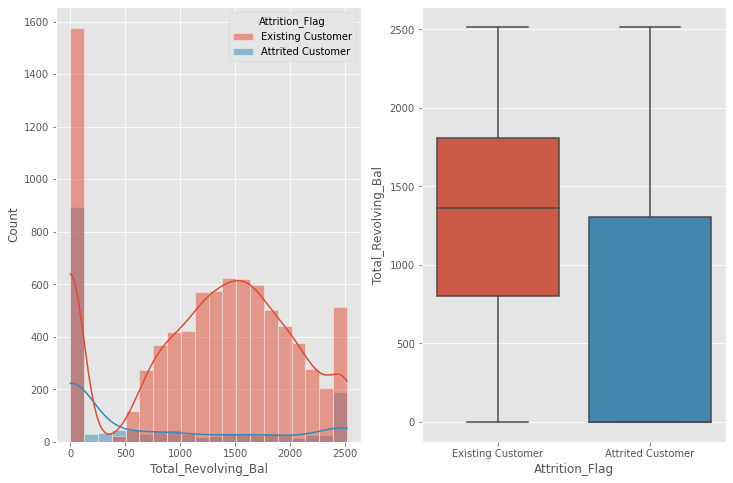

In [17]:
plot_num('Total_Revolving_Bal')

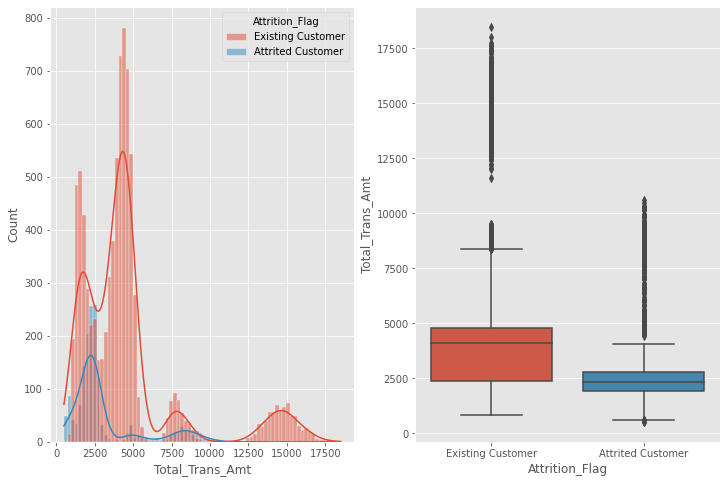

In [18]:
plot_num('Total_Trans_Amt')

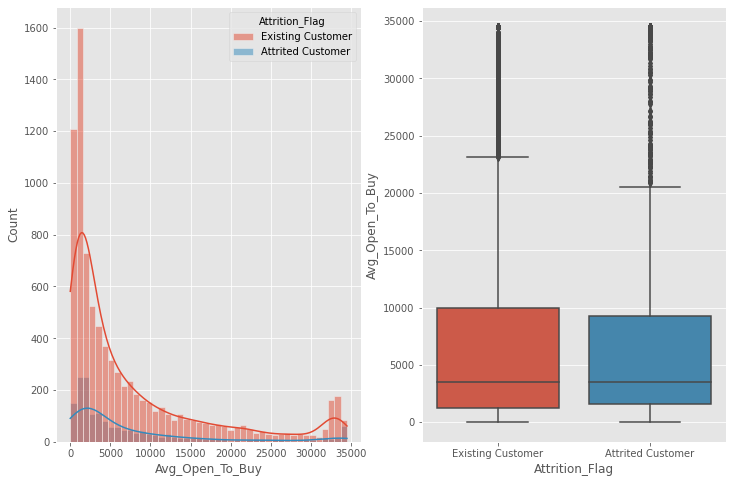

In [19]:
plot_num('Avg_Open_To_Buy')

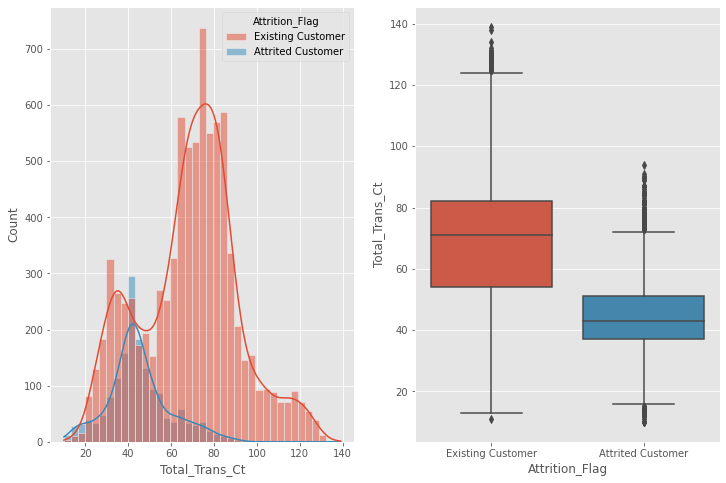

In [20]:
plot_num('Total_Trans_Ct')

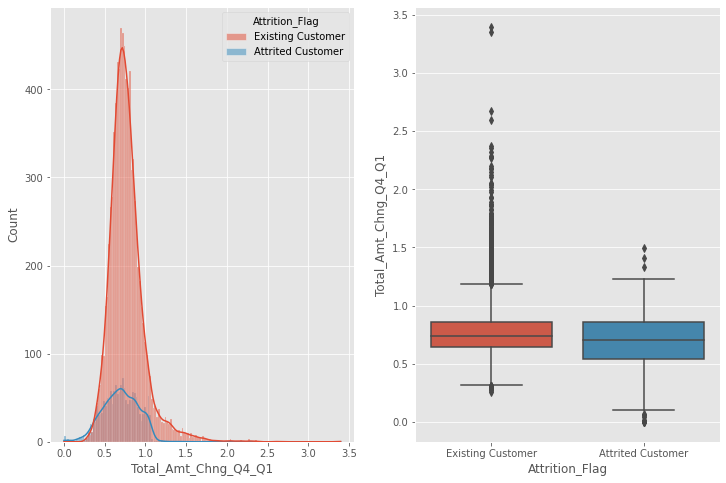

In [21]:
plot_num('Total_Amt_Chng_Q4_Q1')

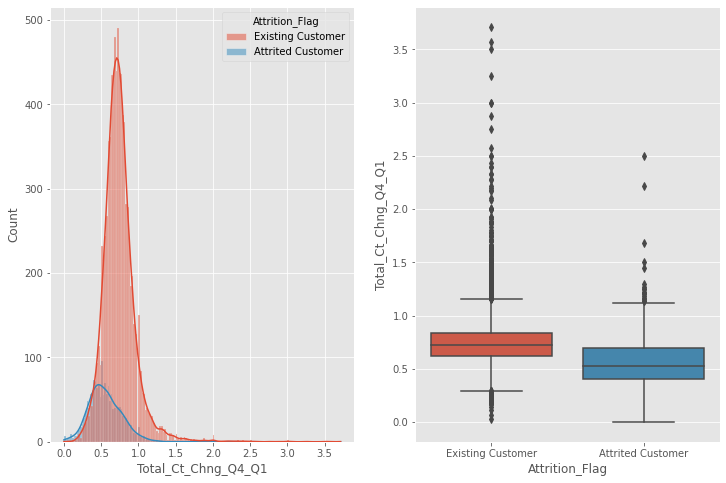

In [22]:
plot_num('Total_Ct_Chng_Q4_Q1')

**Total_Trans_Ct, Total_Trans_Amt, Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1 and Avg_Utilization_Ratio seems to have effect on determining whether a customer leave service or not.**

**While Age and month_on_book variable seems irrevalant to decision whether a customer leave service or not.**

In [23]:
num=['Avg_Utilization_Ratio','Customer_Age','Credit_Limit','Months_on_book',
     'Total_Revolving_Bal','Total_Trans_Amt','Avg_Open_To_Buy','Total_Trans_Ct',
     'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']

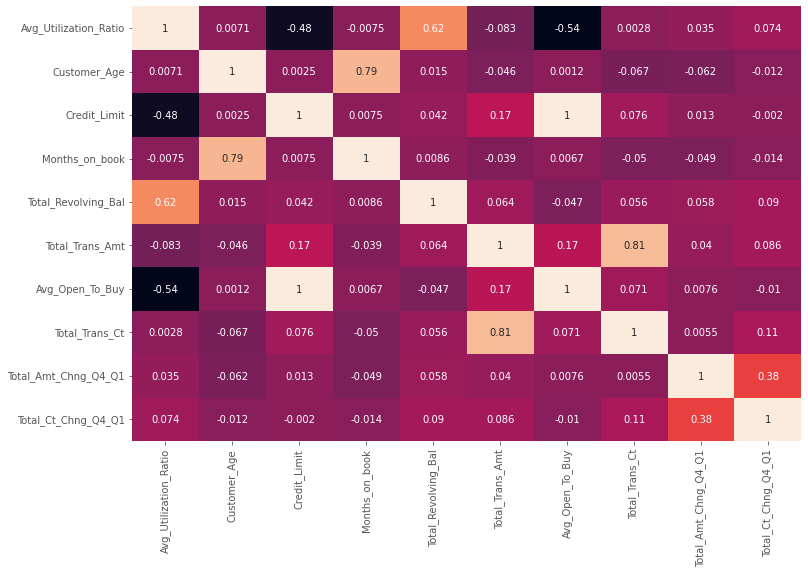

In [24]:
sns.heatmap(data[num].corr(),cbar=False,annot=True);

In [25]:
col=['Avg_Utilization_Ratio','Total_Revolving_Bal','Total_Trans_Amt',
     'Avg_Open_To_Buy','Total_Trans_Ct','Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1',
     'Attrition_Flag']

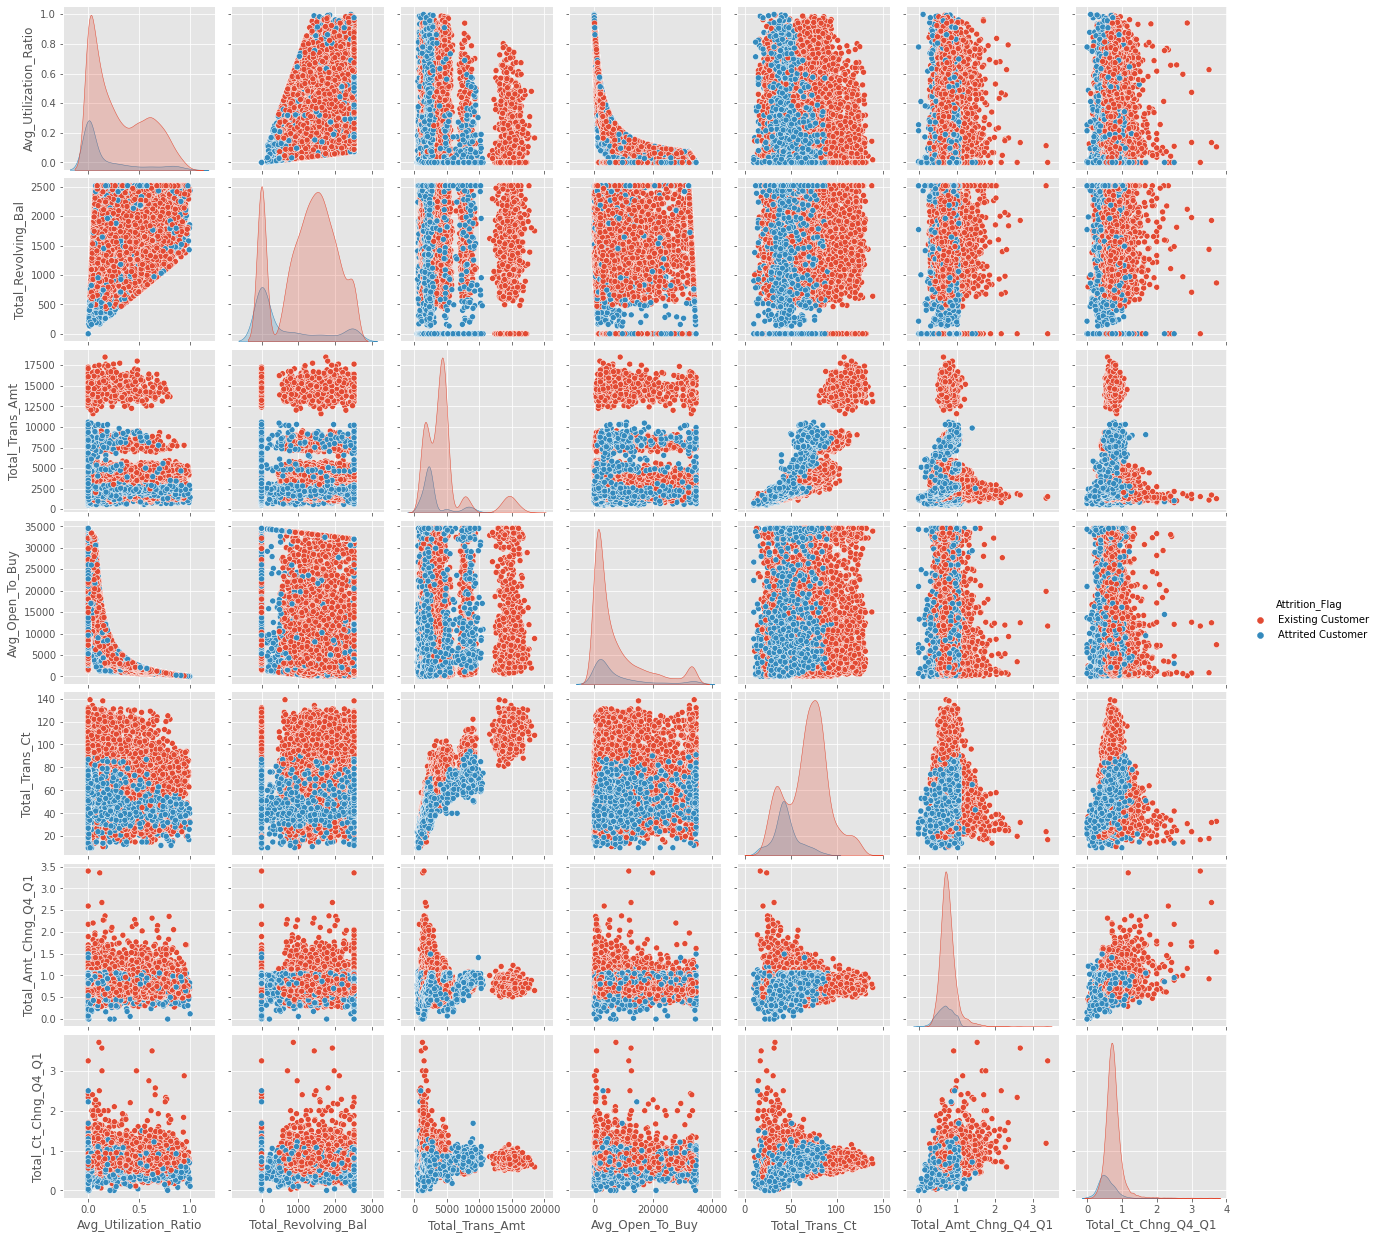

In [26]:
sns.pairplot(data[col],hue='Attrition_Flag');

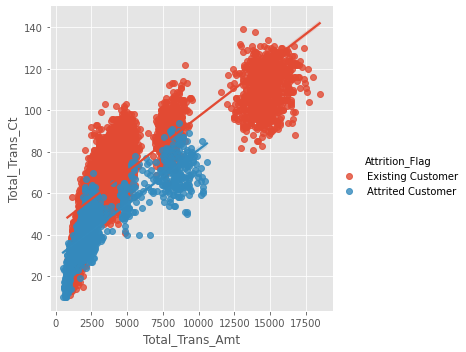

In [27]:
sns.lmplot(x='Total_Trans_Amt',y='Total_Trans_Ct',hue='Attrition_Flag',data=data);

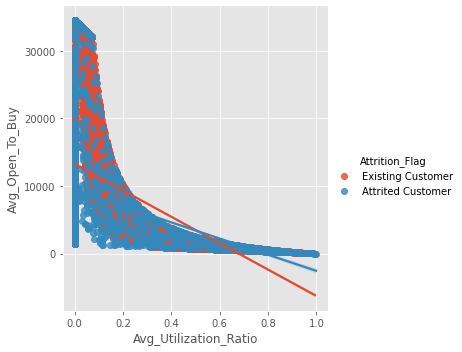

In [28]:
sns.lmplot(x='Avg_Utilization_Ratio',y='Avg_Open_To_Buy',hue='Attrition_Flag',data=data);

**There are non-linear relationship between target variable and input variable, also many input variables doesn't have gaussian distribution.**

In [29]:
cat=['Attrition_Flag', 'Gender','Dependent_count', 'Education_Level', 'Marital_Status',
     'Income_Category', 'Card_Category', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
     'Contacts_Count_12_mon' ]

In [30]:
def call():
    
    for i in range(len(cat)):
        
        print(data[cat[i]].unique())
        print(data[cat[i]].value_counts())
        print("**"*20+'\n')
        
call()

['Existing Customer' 'Attrited Customer']
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
****************************************

['M' 'F']
F    5358
M    4769
Name: Gender, dtype: int64
****************************************

[3 5 4 2 0 1]
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
****************************************

['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
****************************************

['Married' 'Single' 'Unknown' 'Divorced']
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
****************************************

['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'

In [31]:
data['Attrition_Flag']=data['Attrition_Flag'].replace({'Existing Customer':0,'Attrited Customer':1})

In [32]:
def plot_cat(var):
    
    inter=data.groupby(var)['Attrition_Flag'].mean()
    order=inter.index
    
    plt.subplot(1,2,1)
    sns.countplot(x=var,data=data,order=order);
    
    plt.subplot(1,2,2)
    plt.pie(inter,labels=inter.index,autopct="%0.1f%%",radius=1.2);
    
    plt.tight_layout()

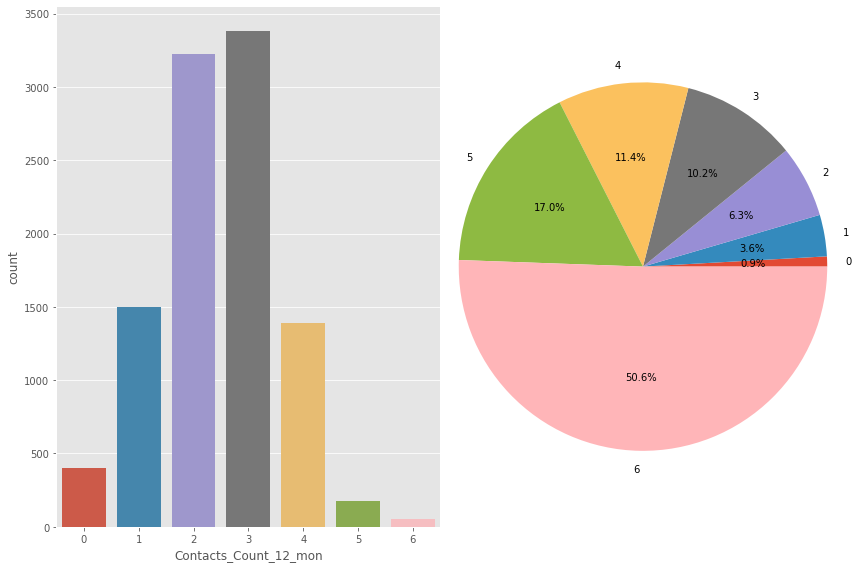

In [33]:
plot_cat('Contacts_Count_12_mon')

**As the no of contacts with the customers increases, the percentage of customer leaving the services increases.**

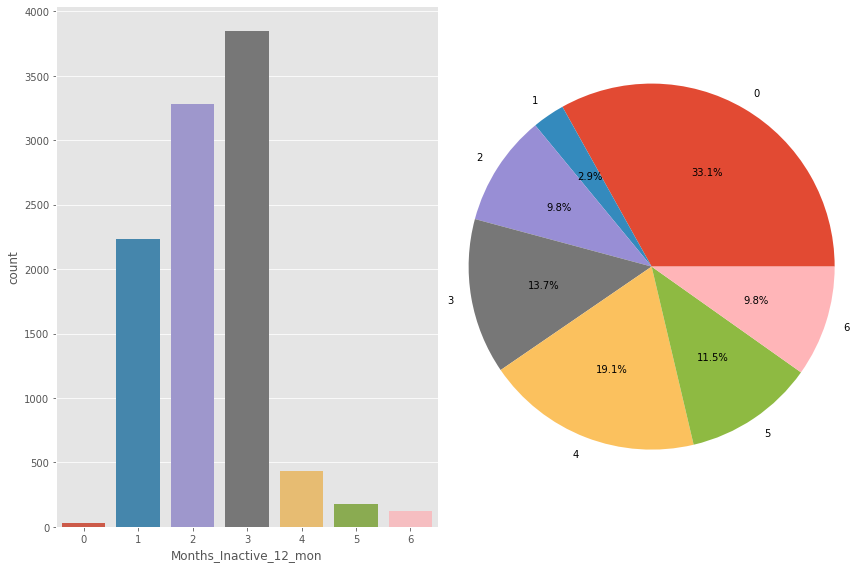

In [34]:
plot_cat('Months_Inactive_12_mon')

**There is high percentage of customers who leave service while being inactive for less than month.**

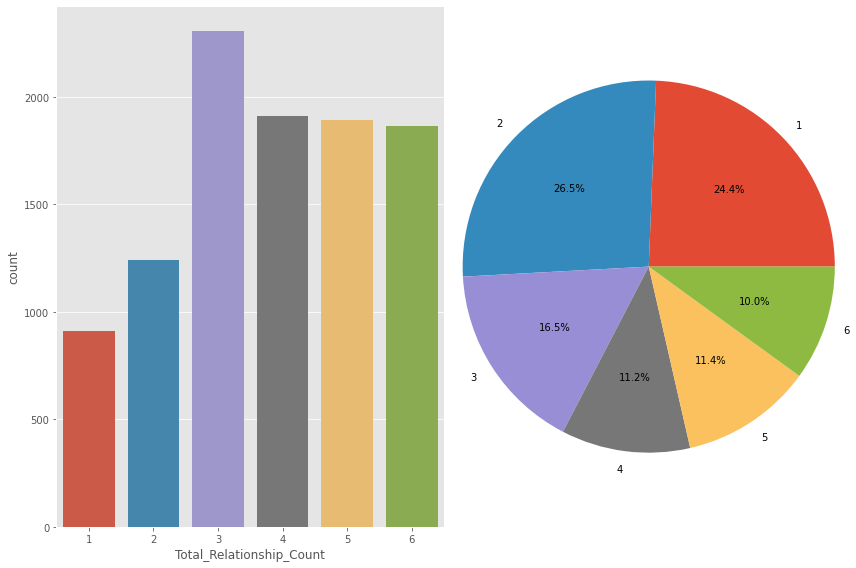

In [35]:
plot_cat('Total_Relationship_Count')

**Customers having 1 or 2 products have more chances of leaving the services then those helding more products.**

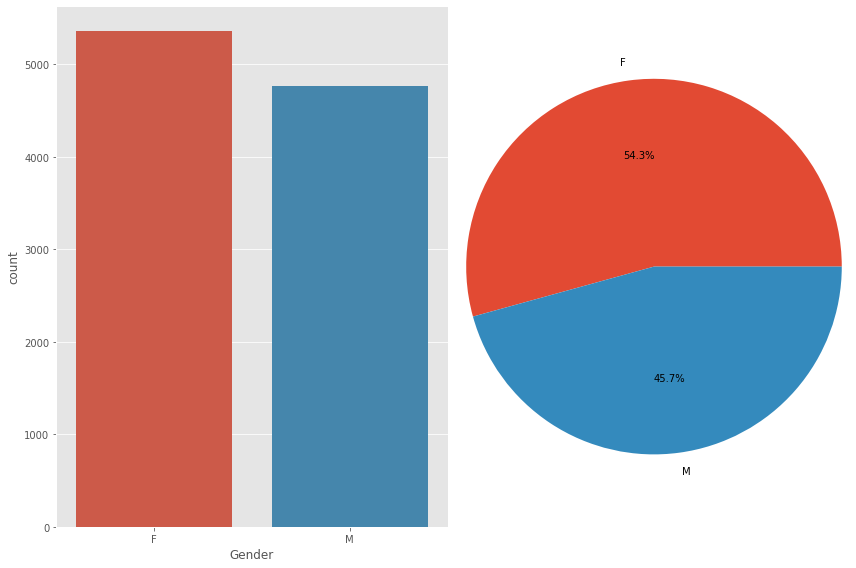

In [36]:
plot_cat('Gender')

# Data Preprocessing

In [37]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split

In [38]:
X=data.drop(['CLIENTNUM','Attrition_Flag'],axis=1)
y=data['Attrition_Flag']

In [39]:
cat=X.select_dtypes(include='object').columns
cat

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')

In [40]:
X_cat=pd.get_dummies(X[cat],drop_first=True)

In [41]:
num=X.select_dtypes(exclude='object').columns
num

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [42]:
transformer=PowerTransformer()
X_num=transformer.fit_transform(X[num])

X_num=pd.DataFrame(X_num,columns=num)

In [43]:
X=pd.concat([X_cat,X_num],axis=1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,
                                                    random_state=42)

# Evaluation Metric

**We will use precision recall curve auc(area under curve) score to evaluate models performances. The positive class is more important than negative class, because misclassifying postive example as nagative example result in loss of business.**

In [45]:
from sklearn.metrics import precision_recall_curve,auc
from sklearn.metrics import make_scorer

In [46]:
def auc_score(y_true,y_probs):
    precision,recall,_=precision_recall_curve(y_true,y_probs)
    return auc(recall,precision)

In [47]:
metric=make_scorer(auc_score,needs_proba=True)

# Feature Selection

In [48]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

**Feature selection using feature importance method that uses estimator to determine the importance of the variable in determining the value of target variable.Because the data contains non-linear,multi-variate complex relations we will use random forest and xgboost.**

In [49]:
fs_rf=SelectFromModel(RandomForestClassifier()).fit(X_train,y_train)
imp_rf=pd.Series(fs_rf.estimator_.feature_importances_,index=X_train.columns).sort_values(ascending=False)

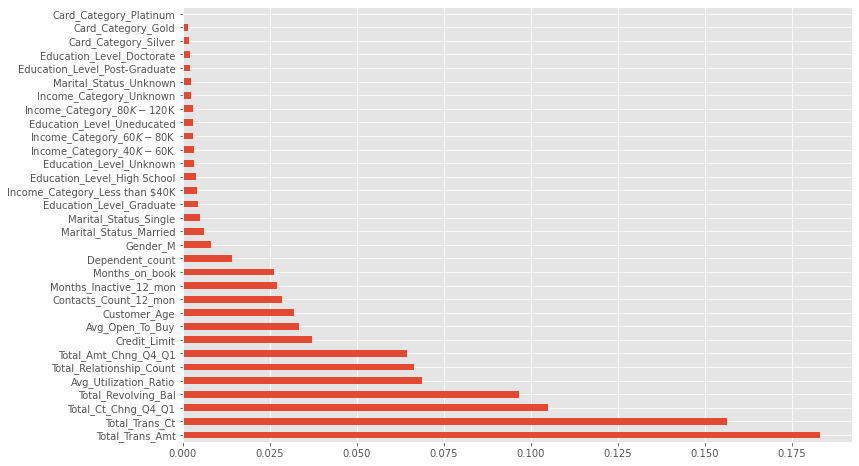

In [50]:
imp_rf.plot(kind='barh');

In [51]:
fs_xgb=SelectFromModel(XGBClassifier()).fit(X_train,y_train)
imp_xgb=pd.Series(fs_xgb.estimator_.feature_importances_,index=X_train.columns).sort_values(ascending=False)

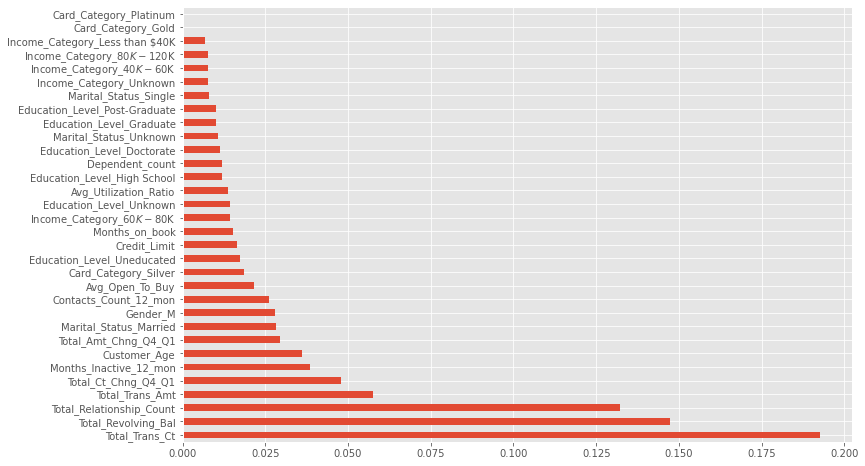

In [52]:
imp_xgb.plot(kind='barh');

**Both Methods supports our findings from data visualization section. Random forest method features are more in line with the finding therefore we will rf as SelectFromModel estimator.********

In [53]:
features= ['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
           'Total_Revolving_Bal', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1',
           'Total_Relationship_Count', 'Avg_Open_To_Buy', 'Credit_Limit',
           'Customer_Age', 'Contacts_Count_12_mon', 'Months_on_book',
           'Months_Inactive_12_mon', 'Dependent_count'] 

In [54]:
X_train=X_train[features]
X_test=X_test[features]

**By using feature selection we have reduce the number of features from 32 to 14.**

# Algorithm Spot Checking

In [55]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [56]:
def get_models():
    
    models=[]
    names=[]
    
    models.append(LogisticRegression())
    names.append('lr')               
                  
    models.append(KNeighborsClassifier())
    names.append('knn')
    
    models.append(SVC(probability=True))
    names.append('svc')
    
    models.append(RandomForestClassifier())
    names.append('rf')
    
    models.append(AdaBoostClassifier())
    names.append('adb')
    
    models.append(XGBClassifier())
    names.append('xgb')

    return models,names

In [57]:
def evaluate(X,y):
    
    models,names=get_models()
    results=[]
    
    for i in range(len(models)):
        cv=StratifiedKFold(n_splits=5)
        scores=cross_val_score(models[i],X,y,scoring=metric,cv=cv)
        
        results.append(scores)
        
    plt.boxplot(results,labels=names,showmeans=True);

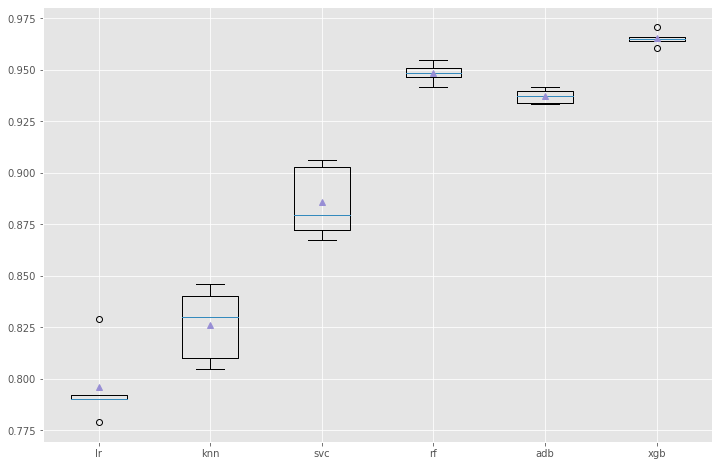

In [58]:
evaluate(X_train,y_train)

**Xgboost model has performed best.**

# Class Distribution Balancing

In [59]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

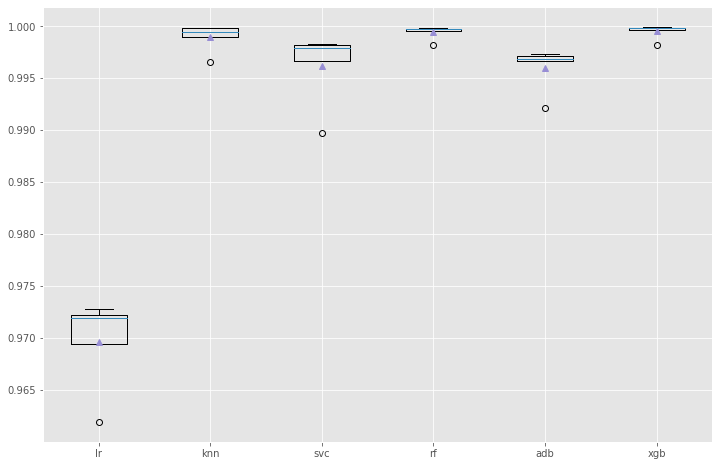

In [60]:
resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
X_rs,y_rs=resample.fit_resample(X_train,y_train)

evaluate(X_rs,y_rs)

**Data sampling has increased models performance substanstially.Therefore we will use it**

In [61]:
X_train,y_train=resample.fit_resample(X_train,y_train)

# Final Model

In [62]:
model=XGBClassifier()
model.fit(X_train,y_train)
y_probs=model.predict_proba(X_test)

In [63]:
precision,recall,thresholds=precision_recall_curve(y_test,y_probs[:,1])
print(f'Area under precision_recall_curve: {auc(recall,precision)}')

Area under precision_recall_curve: 0.9496678965111486


Text(0, 0.5, 'Precision')

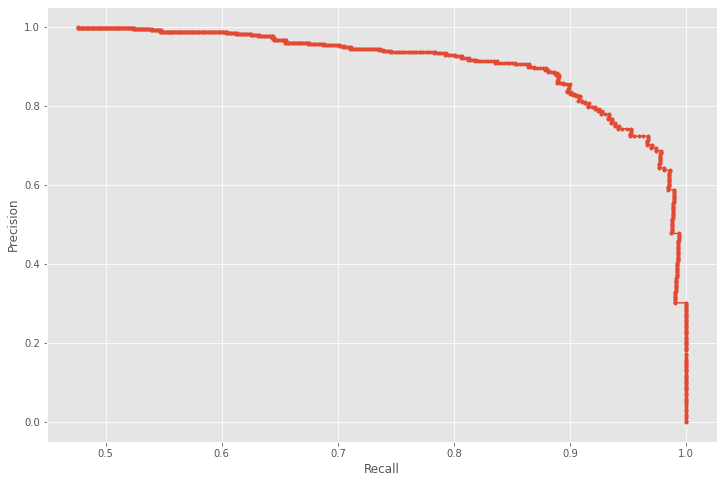

In [64]:
plt.plot(precision,recall, marker='.', label='Xgboost');

plt.xlabel('Recall')
plt.ylabel('Precision')

# Threshold Moving

In [65]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [66]:
f1_score = (2*precision*recall)/(precision+recall)
ix = np.argmax(f1_score)
thresh=thresholds[ix]

print('Best Threshold=%f, f1_score=%.3f' % (thresholds[ix], f1_score[ix]))

Best Threshold=0.805556, f1_score=0.887


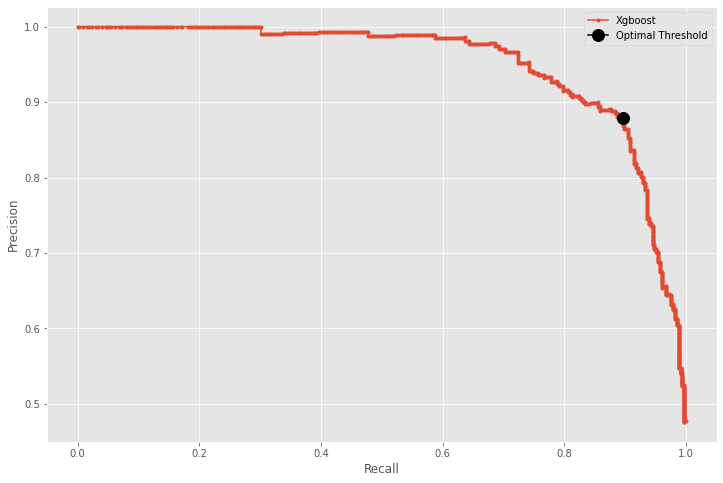

In [67]:
plt.plot(recall, precision, marker='.', label='Xgboost');
plt.plot(recall[ix],precision[ix],marker='o', markersize=12,color='black',label='Optimal Threshold');

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend()

In [68]:
y_pred=(y_probs[:,1]>=thresh)

In [69]:
print(f'Classification_report: \n\n {classification_report(y_test,y_pred)}')

Classification_report: 

               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1701
           1       0.88      0.90      0.89       325

    accuracy                           0.96      2026
   macro avg       0.93      0.94      0.93      2026
weighted avg       0.96      0.96      0.96      2026



In [70]:
val=['Existing Customer','Attrited Customer']
data=pd.DataFrame(confusion_matrix(y_test,y_pred),columns=val,index=val)

Text(50.99999999999999, 0.5, 'True Label')

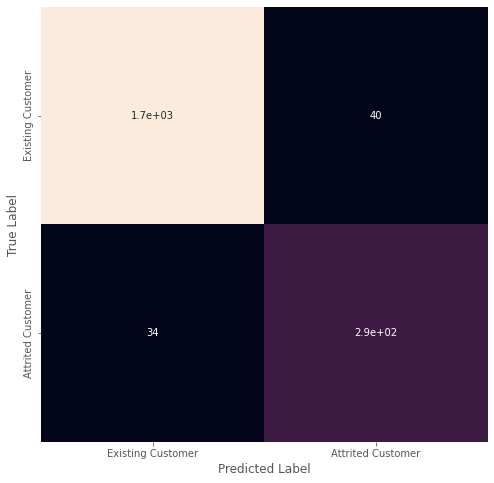

In [71]:
plt.figure(figsize=(8,8))

sns.heatmap(data,annot=True,cbar=False);
plt.xlabel('Predicted Label')
plt.ylabel('True Label')